# Lab. 10: Linear Programming

## Introduction

#### <u>The goal of this lab is to use Linear Programming to solve some problems.</u>

In [1]:
# @title Helper Functions
!pip -q install scikit-optimize

from scipy.optimize import linprog
import numpy as np
import matplotlib.pyplot as plt

## Exercises

You will not be asked to implement parts of the linear programmign paradigm, but instead to transform the description of problems into a linear programming problem, first into the *canonical form* and then into the *slack form*, and solve them using the `scipy` [library](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.linprog.html#scipy-optimize-linprog). Moreover, for exercises 1 and 2 plot the solution space and highlight the different components.

### Example exercise

A large factory makes tables and chairs. Each table returns a profit of 200 EUR and each chair a
profit of 100 EUR. Each table takes 1 unit of metal and 3 units of wood and each chair takes 2 units
of metal and 1 unit of wood. The factory has 600 units of metal and 900 units of wood.

Find the number of **chairs** and **tables** the factory needs to produce to **maximize their profit**, constrained to the **resources** it have.

---

*Canonical form:*

maximize  $2x_1 + x_2$

subject to

> $3x_1 + x_2 ≤ 9$

> $x_1 + 2x_2 ≤ 6$

> $x_1, x_2 ≥ 0$

In [2]:
c = np.array([2, 1])
A = np.array([[3, 1], [1, 2]])
h = np.array([9,6])
result = linprog(-c, A_ub=A, b_ub=h, bounds=[(0,None),(0,None)], method='highs')

*Slack form:*

maximize  $2x_1 + x_2$

subject to

> $3x_1 + x_2 + s_1 = 9$

> $x_1 + 2x_2 + s_2 = 6$

> $x_1, x_2, s_1, s_2 ≥ 0$

In [3]:
c = np.array([2, 1, 0, 0])
A = np.array([[3, 1, 1, 0], [1, 2, 0, 1]])
h = np.array([9,6])
print(linprog(-c, A_eq=A, b_eq=h, bounds=[(0,None),(0,None),(0,None),(0,None)], method='highs'))

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: -6.6000000000000005
              x: [ 2.400e+00  1.800e+00  0.000e+00  0.000e+00]
            nit: 2
          lower:  residual: [ 2.400e+00  1.800e+00  0.000e+00  0.000e+00]
                 marginals: [ 0.000e+00  0.000e+00  6.000e-01  2.000e-01]
          upper:  residual: [       inf        inf        inf        inf]
                 marginals: [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00]
          eqlin:  residual: [ 0.000e+00  0.000e+00]
                 marginals: [-6.000e-01 -2.000e-01]
        ineqlin:  residual: []
                 marginals: []
 mip_node_count: 0
 mip_dual_bound: 0.0
        mip_gap: 0.0


### Exercise 1/3

A company makes two products (X and Y) using two machines (A and B). Each unit of X that is produced requires 50 minutes processing time on machine A and 30 minutes processing time on machine B. Each unit of Y that is produced requires 24 minutes processing time on machine A and 33 minutes processing time on machine B.

At the start of the current week there are 30 units of X and 90 units of Y in stock. Available processing time on machine A is forecast to be 40 hours and on machine B is forecast to be 35 hours.

The demand for X in the current week is forecast to be 75 units and for Y is forecast to be 95 units. Company policy is to maximise the combined sum of the units of X and the units of Y in stock at the end of the week.

---

#### TODO: transform this problem into its slack form and solve it + visualize the solution space with the different components

In [4]:
# canonical form:
c = np.array([1, 1])
A = np.array([[50, 24], [30, 33]])
h = np.array([2400,2100])
result = linprog(-c, A_ub=A, b_ub=h, bounds=[(0,None),(0,None)], method='highs')

In [5]:
# slack form:
c = np.array([1, 1, 0, 0])
A = np.array([[50, 24, 1, 0], [30, 33, 0, 1]])
h = np.array([2400,2100])

result = linprog(-c, A_eq=A, b_eq=h, bounds=[(0,None),(0,None),(0,None),(0,None)], method='highs')

if result.success:
    print(f"Optimal value: {-result.fun + 50}")
    print(f"Units of X to produce: {round(result.x[0])}")
    print(f"Units of Y to produce: {round(result.x[1])}")
else:
    print("Optimization was not successful.")

Optimal value: 116.4516129032258
Units of X to produce: 31
Units of Y to produce: 35


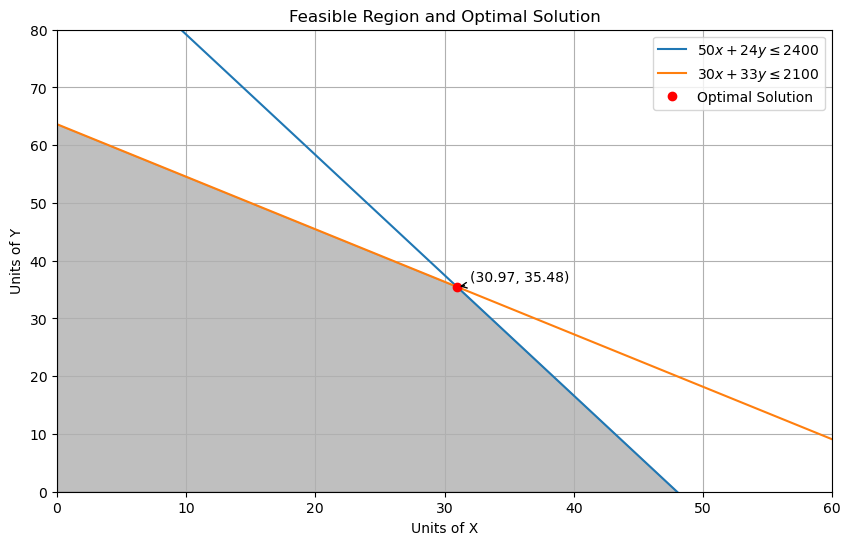

In [6]:
# PLOTTING

plt.figure(figsize=(10, 6))

x = np.linspace(0, 100, 400)
y1 = (2400 - 50 * x) / 24  # Constraint 1: 50x1 + 24x2 = 2400
y2 = (2100 - 30 * x) / 33  # Constraint 2: 30x1 + 33x2 = 2100

plt.plot(x, y1, label=r'$50x + 24y \leq 2400$')
plt.plot(x, y2, label=r'$30x + 33y \leq 2100$')

# Fill feasible region
plt.fill_between(x, np.minimum(y1, y2), 0, where=(np.minimum(y1, y2) >= 0), color='gray', alpha=0.5)

# Plot the optimal solution
if result.success:
    plt.plot(result.x[0], result.x[1], 'ro', label='Optimal Solution')
    plt.annotate(f"({result.x[0]:.2f}, {result.x[1]:.2f})", xy=(result.x[0], result.x[1]), xytext=(result.x[0] + 1, result.x[1] + 1), arrowprops=dict(arrowstyle="->"))

plt.xlim((0, 60))
plt.ylim((0, 80))
plt.xlabel('Units of X')
plt.ylabel('Units of Y')
plt.title('Feasible Region and Optimal Solution')
plt.legend()
plt.grid(True)
plt.show()

### Exercise 2/3

A factory manufactures chairs and tables, each requiring the use of three operations: Cutting, Assembly, and Finishing. The first operation can be used at most 40 hours; the second at most 42 hours; and the third at most 25 hours. A chair requires 1 hour of cutting, 2 hours of assembly, and 1 hour of finishing; a table needs 2 hours of cutting, 1 hour of assembly, and 1 hour of finishing. If the profit is 20 per unit for a chair and 30 for a table, how many units of each should be manufactured to maximize profit?

---

#### TODO: transform this problem into its slack form and solve it + visualize the solution space with the different components

In [7]:
# canonical form:
c = np.array([20, 30])
A = np.array([[1, 2], [2, 1], [1 , 1]])
h = np.array([40, 42, 25])
linprog(-c, A_ub=A, b_ub=h, bounds=[(0,None),(0,None)], method='highs')

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: -650.0
              x: [ 1.000e+01  1.500e+01]
            nit: 3
          lower:  residual: [ 1.000e+01  1.500e+01]
                 marginals: [ 0.000e+00  0.000e+00]
          upper:  residual: [       inf        inf]
                 marginals: [ 0.000e+00  0.000e+00]
          eqlin:  residual: []
                 marginals: []
        ineqlin:  residual: [ 0.000e+00  7.000e+00  0.000e+00]
                 marginals: [-1.000e+01 -0.000e+00 -1.000e+01]
 mip_node_count: 0
 mip_dual_bound: 0.0
        mip_gap: 0.0

In [8]:
# slack form:
c = np.array([20, 30, 0, 0, 0])
A = np.array([[1, 2, 1, 0, 0], [2, 1, 0, 1, 0], [1, 1, 0, 0, 1]])
h = np.array([40, 42, 25])

result = linprog(-c, A_ub=A, b_ub=h, bounds=[(0,None),(0,None),(0,None),(0,None),(0,None)], method='highs')


if result.success:
    print(f"Optimal value: {-result.fun}")
    print(f"Chairs to produce: {round(result.x[0])}")
    print(f"Tables to produce: {round(result.x[1])}")
else:
    print("Optimization was not successful.")

Optimal value: 650.0
Chairs to produce: 10
Tables to produce: 15


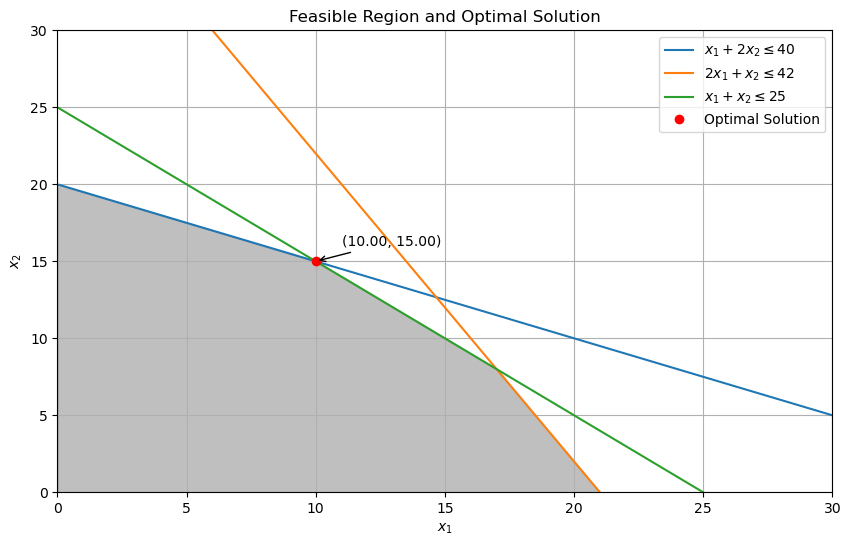

In [9]:
# Plotting
plt.figure(figsize=(10, 6))

# Define the range for plotting
x = np.linspace(0, 30, 400)
y1 = (40 - x) / 2   # Constraint 1: x1 + 2x2 <= 40
y2 = 42 - 2 * x     # Constraint 2: 2x1 + x2 <= 42
y3 = 25 - x         # Constraint 3: x1 + x2 <= 25

# Plot constraints
plt.plot(x, y1, label=r'$x_1 + 2x_2 \leq 40$')
plt.plot(x, y2, label=r'$2x_1 + x_2 \leq 42$')
plt.plot(x, y3, label=r'$x_1 + x_2 \leq 25$')

# Fill feasible region
plt.fill_between(x, np.minimum(np.minimum(y1, y2), y3), 0, where=(np.minimum(np.minimum(y1, y2), y3) >= 0),
                 color='gray', alpha=0.5)

# Plot the optimal solution if it exists
if result.success:
    plt.plot(result.x[0], result.x[1], 'ro', label='Optimal Solution')
    plt.annotate(f"({result.x[0]:.2f}, {result.x[1]:.2f})", xy=(result.x[0], result.x[1]),
                 xytext=(result.x[0] + 1, result.x[1] + 1), arrowprops=dict(arrowstyle="->"))

plt.xlim((0, 30))
plt.ylim((0, 30))
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Feasible Region and Optimal Solution')
plt.legend()
plt.grid(True)
plt.show()

### Exercise 3/3

A mutual fund has $ \\$ 100,000 $ to be invested over a three year horizon.

Three investment options are available:

1. **Annuity:**  the fund can  pay a same amount of new capital at the beginning of each of three years and receive a payoff of 130% of **total capital** invested  at the end of the third year. Once the mutual fund decides to invest in this annuity, it has to keep investing in all subsequent  years in the three year horizon.  
2. **Bank account:** the fund can deposit any amount  into a bank at the beginning of each year and receive its capital plus 6% interest at the end of that year. In addition, the mutual fund is permitted to borrow no more than \$20,000 at the beginning of each year and is asked to pay back the amount borrowed plus 6% interest at the end of the year. The mutual fund can choose whether to deposit or borrow at the beginning of each year.  
3. **Corporate bond:** At the beginning of the second year, a  corporate bond becomes available.
  The fund can buy an amount
  that is no more than $ \\$ $50,000 of this bond at the beginning of the second year and  at the end of the third year receive a payout of 130% of the amount invested in the bond.  


The mutual fund’s objective is to maximize total payout that it owns at the end of the third year.

---

#### **HINT:**

Let  $ x_1 $ be the amount of put in the annuity, $ x_2, x_3, x_4 $ be  bank deposit balances at the beginning of the three years,  and $ x_5 $ be the amount invested  in the corporate bond.

When $ x_2, x_3, x_4 $ are negative, it means that  the mutual fund has borrowed from  bank.

The table below shows the mutual fund’s decision variables together with the timing protocol described above:

||Year 1|Year 2|Year 3|
|:-----------------------:|:-----------------------:|:-----------------------:|:-----------------------:|
|Annuity|$ x_1 $|$ x_1 $|$ x_1 $|
|Bank account|$ x_2 $|$ x_3 $|$ x_4 $|
|Corporate bond|0|$ x_5 $|0|

---

#### **TODO:** formulate this as a linear programming problem try transform this problem into its slack form and solve it

#### *We suggest you to try to do it by yourself or in small group in class, but, in case of need, the solution can be found [here](https://tools-techniques.quantecon.org/lp_intro.html#example-2-investment-problem)*

In [13]:
# Investment Problem

# canonical form:
c = np.array([1.3*3, 0, 0, 1.06, 1.3])
A = np.array([[1, 1, 0, 0, 0], [1, -1.06, 1, 0, 1], [1, 0, -1.06, 1, 0]])
h = np.array([100000, 0, 0])
result = linprog(-c, A_ub=A, b_ub=h, bounds=[(0,None),(-20000,None), (-20000,None), (-20000,None), (0, 50000)], method='highs')

# Print the optimal solution

print("Annuity: $", round(result.x[0], 2))
print("Bank Deposit: $", round(result.x[1], 2))
print("Bank Borrowing: $", round(result.x[2], 2))
print("Corporate Bond: $", round(result.x[3], 2))
print("Optimal total payout: $", -round(result.fun, 2)) 

Annuity: $ 24927.75
Bank Deposit: $ 75072.25
Bank Borrowing: $ 4648.83
Corporate Bond: $ -20000.0
Optimal total payout: $ 141018.24


In [14]:
result

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: -141018.24349792697
              x: [ 2.493e+04  7.507e+04  4.649e+03 -2.000e+04  5.000e+04]
            nit: 0
          lower:  residual: [ 2.493e+04  9.507e+04  2.465e+04  0.000e+00
                              5.000e+04]
                 marginals: [ 0.000e+00  0.000e+00  0.000e+00  1.650e-01
                              0.000e+00]
          upper:  residual: [       inf        inf        inf        inf
                              0.000e+00]
                 marginals: [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00
                             -1.470e-03]
          eqlin:  residual: []
                 marginals: []
        ineqlin:  residual: [ 0.000e+00  0.000e+00  0.000e+00]
                 marginals: [-1.376e+00 -1.299e+00 -1.225e+00]
 mip_node_count: 0
 mip_dual_bound: 0.0
        mip_gap: 0.0